# Loading Data

## Name : Maria Anson
## NUID : 00231419

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The given dataset
dataset = np.array([[0.10, 0.65], [0.50, 0.10], [0.90, 0.35], [-0.20, 0.17], [-0.5, 0.42], [1.50, 2.62]])
dataset

array([[ 0.1 ,  0.65],
       [ 0.5 ,  0.1 ],
       [ 0.9 ,  0.35],
       [-0.2 ,  0.17],
       [-0.5 ,  0.42],
       [ 1.5 ,  2.62]])

In [3]:
# Splitting the dataset into feature x and target y
x = dataset[:,0].reshape(-1,1)
y = dataset[:,1].reshape(-1,1)

print("Feature",x)
print("Target",y)

Feature [[ 0.1]
 [ 0.5]
 [ 0.9]
 [-0.2]
 [-0.5]
 [ 1.5]]
Target [[0.65]
 [0.1 ]
 [0.35]
 [0.17]
 [0.42]
 [2.62]]


### Q8.1

1. Write a python code that inputs the above data and outputs the optimal regression value (θ1∗, θ0∗), using the closed-form solution.

In [4]:
def closed_form(feature, target, pri=True):
    # Adding constant for bias
    feature = np.append(feature, np.ones((feature.shape[0],1)), axis=1)
    # Closed form Solution
    theta = np.dot(np.dot(np.linalg.inv(np.dot(feature.T, feature)), feature.T), target)
    if pri:
        print("The optimal parameters for theta1 and theta0 are", theta)
    
    return theta

In [10]:
closed_form(x,y, False)

array([[0.90305437],
       [0.37216249]])

In [6]:
def predict(feature,theta):
    # Adding a column of 1's to the feature matrix.
    feature = np.append(feature, np.ones((feature.shape[0],1)), axis=1)
    
    # Calculating the dot product of the feature matrix and theta.
    prediction = np.dot(feature, theta)
    
    return prediction

### Q8.2

2. Plot the data in 2D and plot the estimated line y = θ1∗x + θ0∗.

The optimal parameters for theta1 and theta0 are [[0.90305437]
 [0.37216249]]
Cost 2.220446049250313e-16


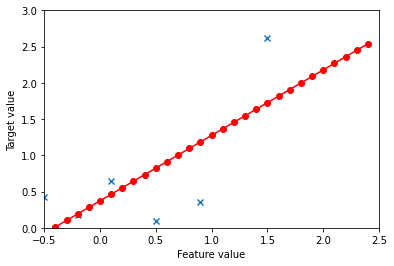

In [7]:
def plot_points_with_regression_line(feature, target):
    # Plotting the actual data points on the graph.
    plt.scatter(feature, target, marker ='x')
    plt.xlabel("Feature value")
    plt.ylabel("Target value")
    
    # Finding the minimum and maximum values of the feature.
    start = min(feature[:,0])
    end = max(feature[:,0])
    
    # Finding the optimal values of theta for the given data.
    theta = closed_form(feature, target)

    # Creating an array of values from start to end with a step size of 0.1.
    input_data = np.arange(start,end+1,.1)
    
    # The above code is reshaping the input data into a column vector and then using the predict function to predict the output.
    predictions = predict(input_data.reshape(-1,1), theta)

    # Plotting the regression line.
    plt.plot(input_data, predictions, marker = 'o', color = 'red')
    plt.xlim(start,end+1)
    plt.ylim(0,3)
    
plot_points_with_regression_line(x,y)
print("Cost",np.sqrt(np.sum(y - predict(x, closed_form(x,y, False)))**2))

### Q8.3

3. Remove the last point, i.e., (1.50,2.62), from the data and repeat the previous part. Is the new
estimated line close to the estimated line in the previous part? Provide a justification.

The optimal parameters for theta1 and theta0 are [[-0.06850649]
 [ 0.34896104]]
Cost 3.885780586188048e-16


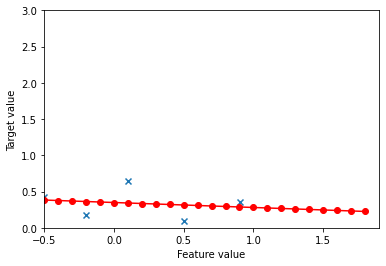

In [8]:
# Removing the entry of (1.50,2.62)
modified_x = x[:-1,]
modified_y = y[:-1,]

plot_points_with_regression_line(modified_x, modified_y)
print("Cost",np.sqrt(np.sum(modified_y - predict(modified_x, closed_form(modified_x,modified_y,False)))**2))

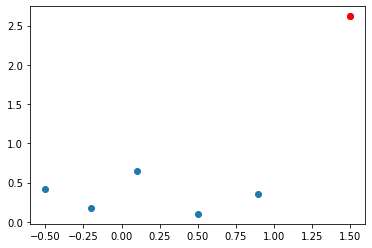

In [9]:
plt.scatter(x[:,0], y)
plt.scatter(1.5,2.62, color='red')
plt.show()

No the new estimated line is completely different from the previously estimated best fit line. 

The reason being is the data point (1.5, 2.62) is an outlier as it lies far from the other value in terms of both y and x value and this can be visually seen in the plot above.

Best Fit Line 1 : Since the point (1.5, 2.62) is used in the training, the best fit line shifted towards the outlier value because that's how our cost function is designed. High error value for outlier, so optimal solution will be a line passing between the outlier and inlier.

Best Fit Line 2 : Since the outlier is removed and all the other points are inliers as we could see it from the plot, the optimal solution passes through most of the point that lies in the lower part of the graph